# Linear regression

## Libraries and settings

In [72]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_08


## Import the apartment data

In [73]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", 
                      sep=";", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [74]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the simple linear regression model

In [75]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1272.94
Slope of regression line (beta):          13.548
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3678


### Plot regression line

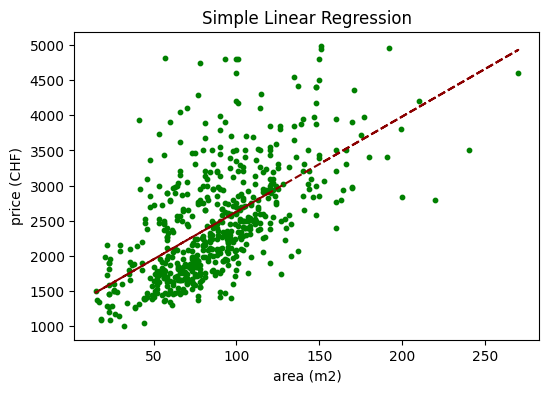

In [76]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [77]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2898.72
1st Observed price in dataset: 1441.00
1st Residual price in dataset: -1457.72


### Plot histogram of residuals

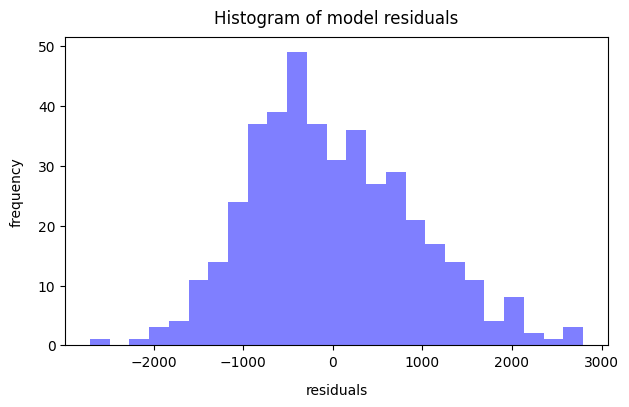

In [78]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [79]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 2031.6
Observed price: 1640.0, Predicted price: 2004.5
Observed price: 1568.0, Predicted price: 2167.1
Observed price: 2290.0, Predicted price: 2207.8
Observed price: 4950.0, Predicted price: 2627.8
Observed price: 1787.0, Predicted price: 2248.4
Observed price: 3495.0, Predicted price: 2519.4
Observed price: 2450.0, Predicted price: 2031.6
Observed price: 3390.0, Predicted price: 2871.6
Observed price: 2836.0, Predicted price: 2573.6


# Task 1

## b) 
> Go to the section ‘Simple linear regression …’. Create a new simple linear 
regression model with price_per_m2 as target variable and area as the explanatory 
variable. Check the R-squared value of this new model. State whether the R-
squared value is higher compared to the original model with price as target 
variable and area as the explanatory variable. Also check the histogram of model 
residuals. State whether the residuals are normally distributed or not.

New Linear regression result:
Intercept with y-axis (alpha):            51.24
Slope of regression line (beta):          -0.227
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3551


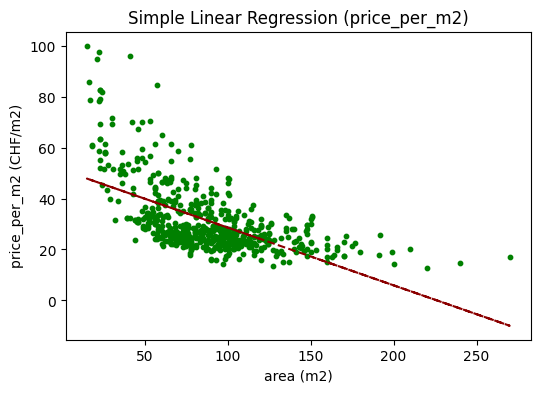

In [80]:

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df['area'], 
                                                                    df['price_per_m2'], 
                                                                    test_size=0.20, 
                                                                    random_state=42)

# Fit the new regression model
slope_new, intercept_new1, r_new, p_new, std_err_new = stats.linregress(X_train_new, y_train_new)

# Print results of the new regression model
print('New Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept_new1:.2f}')
print(f'Slope of regression line (beta):          {slope_new:.3f}')
print(f'p-value:                                  {p_new:.4f}')
print(f'R-squared (coefficient of determination): {r_new**2:.4f}')

# Function to calculate model predictions for the new model
def myfunc_new1(x):
    return slope_new * x + intercept_new1

# Apply myfunc_new() to x, i.e. make predictions 
mymodel_new1 = pd.Series(map(myfunc_new1, X_train_new))

# Calculate model residuals for train data of the new model
residuals_new3 = y_train_new - mymodel_new1

# Scatterplot with regression line for the new model
plt.figure(figsize=(6,4))
plt.scatter(X_train_new, y_train_new, s=10, color='green')
plt.plot(X_train_new, mymodel_new1, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression (price_per_m2)')
plt.xlabel('area (m2)')
plt.ylabel('price_per_m2 (CHF/m2)')

plt.show()

**The R² for price_per_m2 (0.3551) is slightly lower than for price (0.3678), suggesting the original model fits better.**

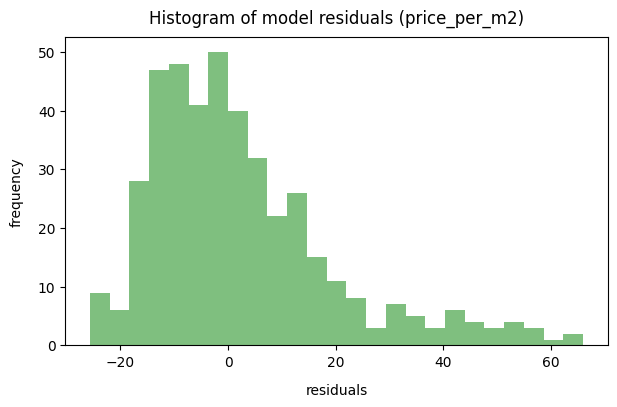

In [81]:
# Plot histogram of residuals for the new model
fig = plt.figure(figsize=(7,4))
n, bins, patches = plt.hist(x=residuals_new3, 
                            bins=25, 
                            color='green',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals (price_per_m2)', fontsize=12, pad=10)

# Show plot
plt.show()

**The residuals are slightly skewed, with more concentration on the left and a narrower spread on the right, suggesting a deviation from normality.**

## c)

> Create a new simple linear regression model with price_per_m2 as target variable 
and rooms as the explanatory variable. Check the R-squared value. State whether 
the R-squared value is higher compared to the original model with price as target 
variable and area as the explanatory variable? Also check the histogram of 
model residuals. State whether the residuals are normally distributed or not. 

New Linear regression result (rooms):
Intercept with y-axis (alpha):            52.96
Slope of regression line (beta):          -6.282
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3116


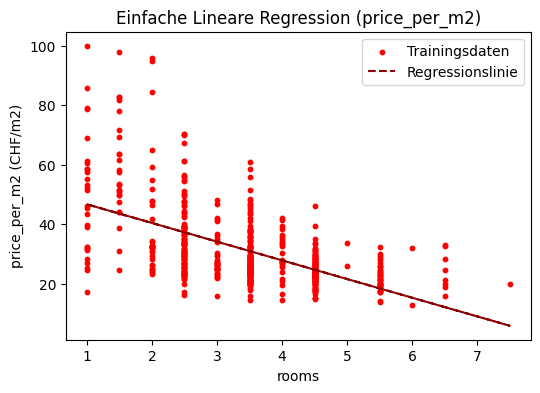

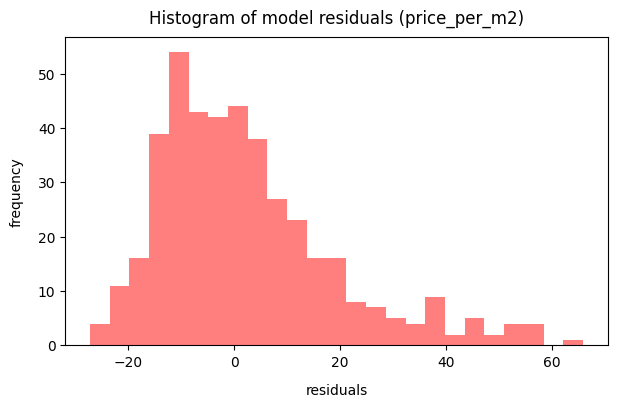

In [82]:

X_train_newr, X_test_newr, y_train_newr, y_test_newr = train_test_split(df['rooms'], 
                                                                    df['price_per_m2'], 
                                                                    test_size=0.20, 
                                                                    random_state=42)

# Fit the new regression model
slope_new, intercept_new4, r_new, p_new, std_err_new = stats.linregress(X_train_newr, y_train_newr)

# Print results of the new regression model
print('New Linear regression result (rooms):')
print(f'Intercept with y-axis (alpha):            {intercept_new4:.2f}')
print(f'Slope of regression line (beta):          {slope_new:.3f}')
print(f'p-value:                                  {p_new:.4f}')
print(f'R-squared (coefficient of determination): {r_new**2:.4f}')

# Function to calculate model predictions for the new model
def myfunc_new(x):
    return slope_new * x + intercept_new4

# Apply myfunc_new() to x, i.e. make predictions 
mymodel_new = pd.Series(map(myfunc_new, X_train_newr))

# Calculate model residuals for train data of the new model
residuals_new4 = y_train_newr - mymodel_new

plt.figure(figsize=(6, 4))
plt.scatter(X_train_newr, y_train_newr, s=10, color='red', label='Trainingsdaten')
plt.plot(X_train_newr, mymodel_new, color='darkred', linestyle='dashed', label='Regressionslinie')
plt.title('Einfache Lineare Regression (price_per_m2)')
plt.xlabel('rooms')
plt.ylabel('price_per_m2 (CHF/m2)')
plt.legend()
plt.show()

# Plot histogram of residuals for the new model
fig = plt.figure(figsize=(7,4))
n, bins, patches = plt.hist(x=residuals_new4, 
                            bins=25, 
                            color='red',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals (price_per_m2)', fontsize=12, pad=10)

# Show plot
plt.show()

**The higher R² of the original model (0.3678 > 0.3116) indicates it explains the data better than the model with price_per_m2 and rooms.**

**The histogram of residuals deviates slightly from a perfect normal distribution, suggesting the model may not account for all relevant factors.**

## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [83]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens
503   120   165.018625
6      65   525.662252
400    90   424.146342
644    63  1044.628957
484    91   399.525129 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [84]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     409.2
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          3.50e-111
Time:                        15:04:31   Log-Likelihood:                -4420.2
No. Observations:                 577   AIC:                             8846.
Df Residuals:                     574   BIC:                             8860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.1861     78.086      4.241      0.0

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

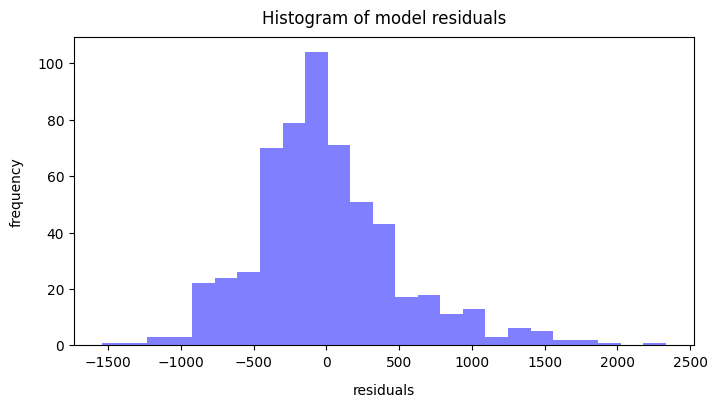

In [85]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

## d)

> Go to the section ‘Multiple linear regression …’. Include the variables 
mean_taxable_income and dist_supermarket as additional variables in the model. 
State whether the variables are statistically significant (at the 5% significance level). Note that this can be figured out by looking at the part of the output-table 
shown below. If the value P>|t|is smaller than 0.05, than a variable is statistically 
significant (at the 5% significance level). 

In [86]:
# Create train and test samples with additional variables
X2_train_new, X2_test_new, y2_train_new, y2_test_new = train_test_split(df[['area',
                                                                            'pop_dens',
                                                                            'mean_taxable_income',
                                                                            'dist_supermarket']], 
                                                                        df['price'], 
                                                                        test_size=0.20, 
                                                                        random_state=42)

# Add constant to the model
X2_train_new_const = sm.add_constant(X2_train_new)

# Create the multiple regression model
olsmod_new = sm.OLS(y2_train_new, X2_train_new_const)
olsres_new = olsmod_new.fit()

# Print full model output
print(olsres_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          6.98e-116
Time:                        15:04:31   Log-Likelihood:                -4403.2
No. Observations:                 577   AIC:                             8816.
Df Residuals:                     572   BIC:                             8838.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -386.2135    

**The variables area, pop_dens, and mean_taxable_income are statistically significant at a 5% significance level.
The variable dist_supermarket is not significant (p-value = 0.514) and may be excluded as it adds little to predicting price.
Overall, the model is significant and explains a substantial portion of the variance (R² = 0.611).**

### Compare the observed prices with the predicted prices

In [87]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1730.3
Observed price: 1640.0, Predicted price: 1600.6
Observed price: 1568.0, Predicted price: 1806.3
Observed price: 2290.0, Predicted price: 2704.6
Observed price: 4950.0, Predicted price: 2519.3
Observed price: 1787.0, Predicted price: 2201.5
Observed price: 3495.0, Predicted price: 3116.8
Observed price: 2450.0, Predicted price: 2471.6
Observed price: 3390.0, Predicted price: 2685.2
Observed price: 2836.0, Predicted price: 2405.3


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [88]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-19 15:04:31
Python Version: 3.11.10
-----------------------------------
